## <font color=brown> <p style="text-align: center;">&#9733; Building Visualization With Python  &#9733;</p></font> 

<img src="fy.png" align="center" width="800" height="00">

<h4>This notebook showa all visualizations that can be made using Python. This can be a good resource to learn and play with python and its available and libraries.</h4>
<h4>The dataset used in this notebook is IBM's HR dataset which is free to download from Kaggle.com</h4>
<h4>[Download the IBM HR dataset from here](https://www.kaggle.com/esmaeil391/ibm-hr) </a></h4>
<h4>After downloading the dataset to your personal computer, upload it into your Jupyter project folder.</h4>

### <font color=green> <p style="text-align: center;">&#9733; Initial Preparation  &#9733;</p></font>

#### <font color=navy> <p style="text-align: left;">First import the libraries necessary to build visualization. </p></font> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print('Done')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Done


#### <font color=navy> <p style="text-align: left;">Load the HR dataset as pandas data frame. </p></font>

In [2]:
df = pd.read_csv ("IBM_HR.csv")

#### <font color=navy> <p style="text-align: left;">Have a look at your columns heading and types of data within the dataset. </p></font>

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### <font color=navy> <p style="text-align: left;">&#9734; Pie Chart </p></font>

#### <font color=navy> <p style="text-align: left;">To see the number of unique values (different categories) in the department column first must perform some preprocessing  </p></font>

In [4]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

#### <font color=navy> <p style="text-align: left;">Convert string values to numeric values </p></font>

In [5]:
def label_to_numeric(x):
    if x=='Sales':
        return 1
    if x=='Research & Development':
        return 2
    if x=='Human Resources':
        return 3
   
df['Department'] = df['Department'].apply(label_to_numeric)

#### <font color=navy> <p style="text-align: left;">Check the result </p></font>

In [6]:
df['Department'].unique()

array([1, 2, 3])

#### <font color=navy> <p style="text-align: left;">Check the datatype of the column </p></font>

In [7]:
df['Department'].dtypes

dtype('int64')

#### <font color=navy> <p style="text-align: left;">Convert the datatype from int to category </p></font>

In [52]:
 df['Department'] = df['Department'].astype('category', copy=False)

#### <font color=navy> <p style="text-align: left;">Now your variable is ready and prepared for visualization </p></font>

Pie chart is used to illustrate numerical proportion. The point of a pie chart is to show the relationship of parts out of a whole. For example comparison between a percentiles from 100%.  <br>



#### <font color=navy> <p style="text-align: left;">First create an object (dpartmentgrouped) from department and use groupby function to calculate the sum of employees in each department. Then use this object to build the chart </p></font>

In [53]:
dpartmentgrouped = df.groupby('Department', as_index=False).sum()

#### <font color=navy> <p style="text-align: left;">To make the chart more comprehensible, define lables for each categories (thus instead of 1,2,3 the chart will show exact names of each department) and run the pie plot code</p></font>

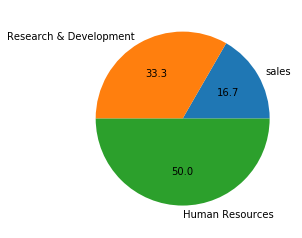

In [54]:
LABELS = 'sales', 'Research & Development', 'Human Resources'
plt.pie(dpartmentgrouped['Department'], 
labels=LABELS, 
autopct='%.1f')

plt.show()

#### <font color=navy> <p style="text-align: left;">The same pie chart &#11014;can be modified by adding legend, defining it’s sizes, defining a part to explode, and adding colors to labels.</p></font>

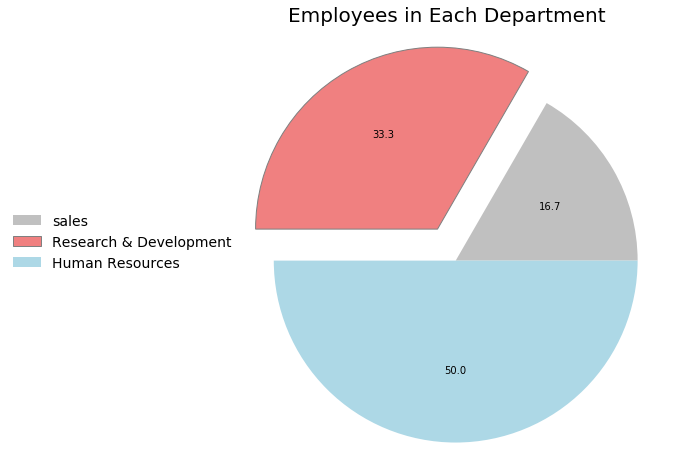

In [149]:
COLORS = ['silver', 'lightcoral', 'lightblue']
LABELS = 'sales', 'Research & Development', 'Human Resources'
EXPLODE = (0, 0.2, 0)

fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = plt.pie(dpartmentgrouped['Department'], 
autopct='%.1f', colors=COLORS, explode=EXPLODE)

wedges[1].set(edgecolor="gray", linewidth=1)
plt.title('Employees in Each Department', loc='center', fontsize=20)
plt.legend(LABELS, loc='upper left', fontsize=14, frameon=False, bbox_to_anchor= (-0.5, 0.6))
plt.axis('equal')
plt.show()


### <font color=navy> <p style="text-align: left;">&#9734; Bar Chart (Catplot) </p></font>

#### <font color=Navy> Catplot is best used for categorical data to show frequency information. Bar plots help to easily see the differences between the categories based on the size of the bar. categories are also easily divided and colour coded too.</font> 

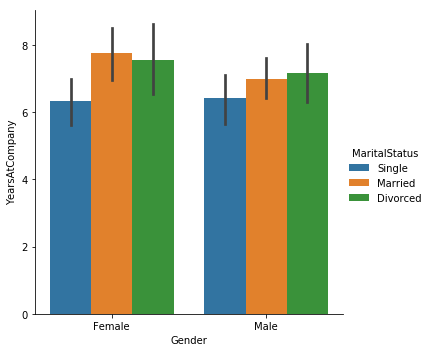

In [192]:
sns.catplot(x= 'Gender', y= 'YearsAtCompany', data=df,
             hue='MaritalStatus', 
           kind='bar')





### <font color=navy> <p style="text-align: left;">&#9734; Scatterplot </p></font>

#### <font color=Navy> plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.</font> 

<function matplotlib.pyplot.show(*args, **kw)>

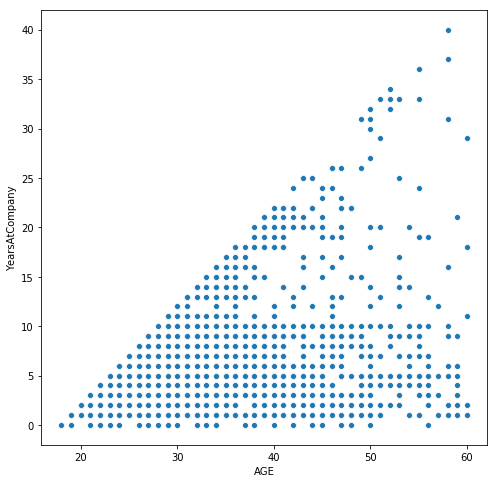

In [184]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Age', y='YearsAtCompany', data=df)
plt.xlabel('AGE')
plt.ylabel('YearsAtCompany')
plt.show


##### <font color=navy> <p style="text-align: left;">The same scatter plot can be modified and improved by defining hue, color and size of bubble. </p></font>

<function matplotlib.pyplot.show(*args, **kw)>

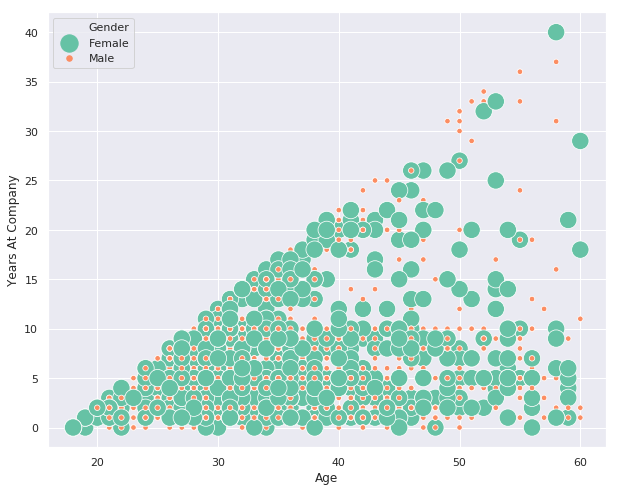

In [297]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='YearsAtCompany',
                hue='Gender',
                size='Gender', 
                sizes=(30, 300), hue_norm=(0, 7), legend="full",
                data=df, palette="Set2")
plt.xlabel('Age')
plt.ylabel('Years At Company')
plt.show

### <font color=navy> <p style="text-align: left;">&#9734; Pair Plot </p></font>

##### <font color=navy> <p style="text-align: left;">The relationship between all variables are analyzed and illustrated in pair. </p></font>

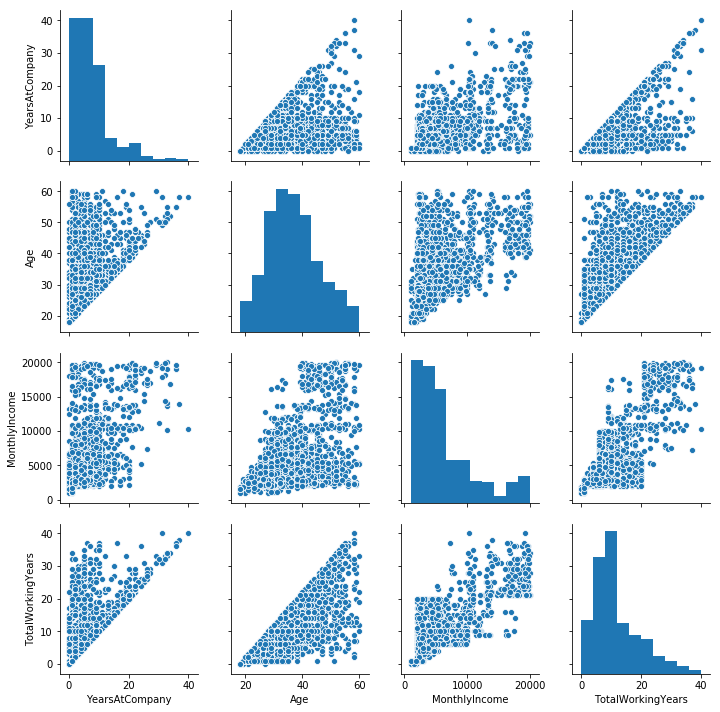

In [207]:
sns.pairplot(df1)

#### <font color=navy> <p style="text-align: left;"> The color of data points can be defined based on additional variable. </p></font>

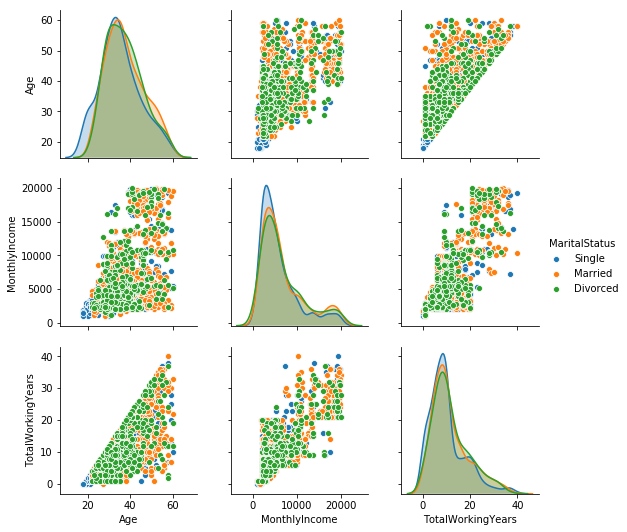

In [234]:
sns.pairplot(df, vars=['Age', 'MonthlyIncome', 'TotalWorkingYears'], hue='MaritalStatus')


### <font color=navy> <p style="text-align: left;">&#9734; Heat map </p></font>

#### <font color=Navy> All values are illustrated in a matrix and represented as colors.</font> 

#### <font color=navy> <p style="text-align: left;">First create an object (sub dataframe) with all the variables that need to be included in correlation analysis and then create the plot. </p></font>

In [210]:
df2 = df[['YearsAtCompany', 'MonthlyIncome', 'TotalWorkingYears']]

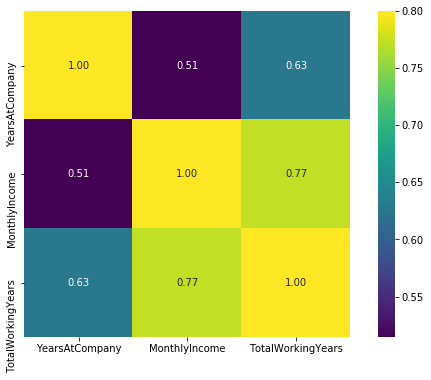

In [215]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = 'viridis')
plt.show()

### <font color=navy> <p style="text-align: left;">&#9734; Stripplot </p></font>

#### <font color=Navy> Shows all the observations within a variable while the locations of points are adjusted automatically to avoid overlap.</font> 

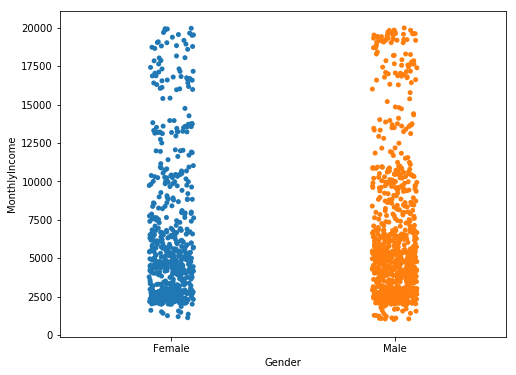

In [213]:
plt.figure(figsize=(8, 6))
sns.stripplot(x= 'Gender', y= 'MonthlyIncome', data=df, jitter=True)

### <font color=navy> <p style="text-align: left;">&#9734; Swarmplots </p></font>

#### <font color=Navy> Shows all the observations within a variable while the locations of points are adjusted automatically to avoid overlap.</font> 

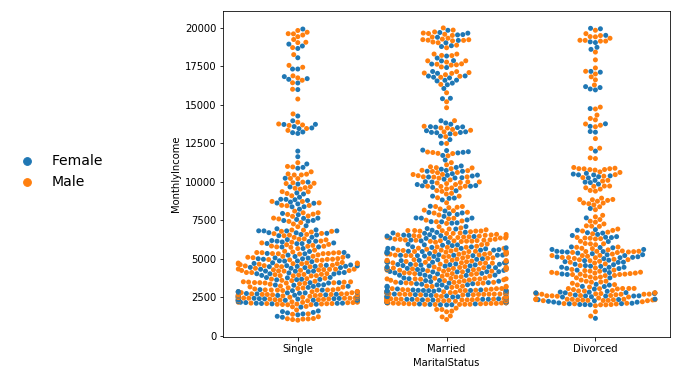

In [230]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x= 'MaritalStatus', y= 'MonthlyIncome', hue='Gender',  data=df)
plt.legend(loc='upper left', fontsize=14, frameon=False, bbox_to_anchor= (-0.5, 0.6))


### <font color=navy> <p style="text-align: left;">&#9734; Boxplot </p></font>

#### <font color=Navy> Boxplots visualize the distribution of variables and provide a clearer view of the standard deviation, median, mean, range of data, and outliers. The bottom and top of the solid-lined box are the first and third quartiles, and the band inside the box is the median. The whiskers extend from the box to show the range of the data.</font> 

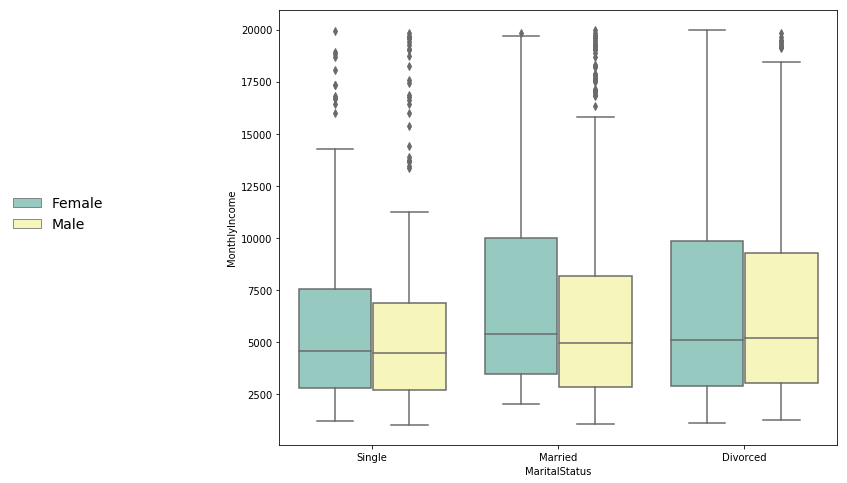

In [232]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x= 'MaritalStatus', y= 'MonthlyIncome', hue='Gender', data=df, palette="Set3")
plt.legend(loc='upper left', fontsize=14, frameon=False, bbox_to_anchor= (-0.5, 0.6))
plt.show()

### <font color=navy> <p style="text-align: left;">&#9734; Violin Plot </p></font>

#### <font color=Navy> Violin plot shows the distribution and range of the data</font> 

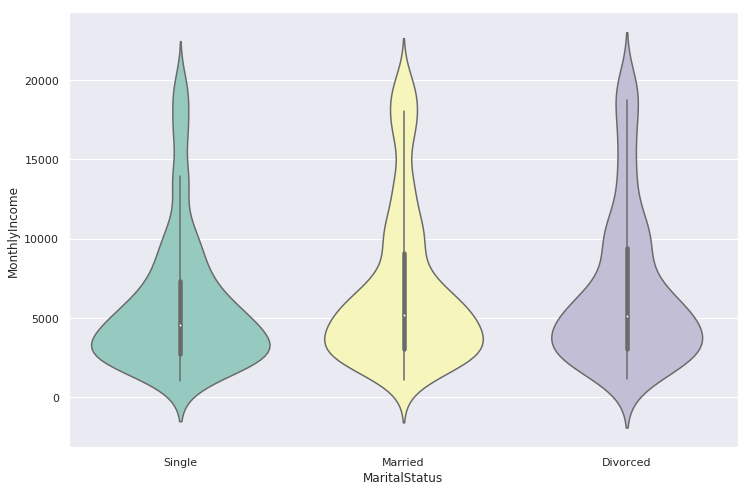

In [248]:
f, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x= 'MaritalStatus', y= 'MonthlyIncome', data=df, palette="Set3")
plt.show()

### <font color=navy> <p style="text-align: left;">&#9734; Point Plot </p></font>

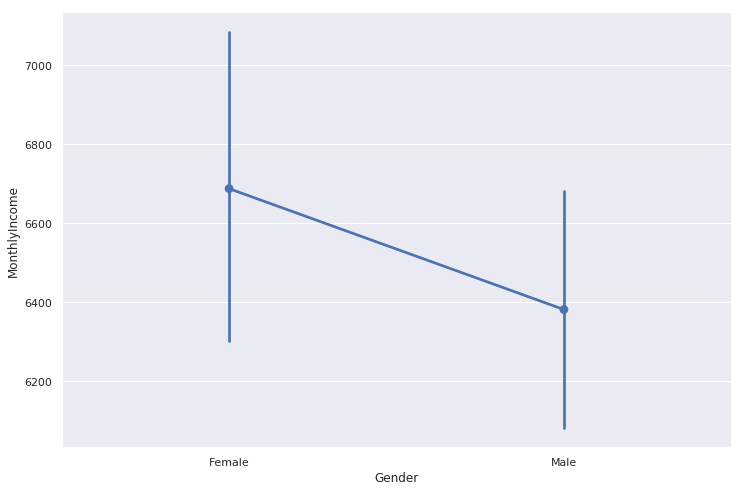

In [250]:
f, ax = plt.subplots(figsize=(12, 8))
sns.pointplot(x= 'Gender', y= 'MonthlyIncome', data=df)
plt.show()

### <font color=navy> <p style="text-align: left;">&#9734; Distribution Plot with KDE line </p></font>

<function matplotlib.pyplot.show(*args, **kw)>

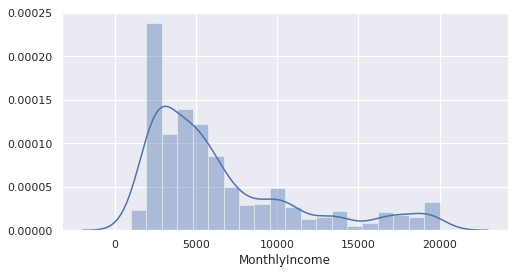

In [252]:
plt.figure(figsize=(8, 4))
sns.distplot(df['MonthlyIncome'])
plt.show

#### <font color=Navy> The same distribution plot without Kernel Distribution Estimator line, vertical axis, and all individual datapoints. The data aso are devided to 40 bins</font> 

<function matplotlib.pyplot.show(*args, **kw)>

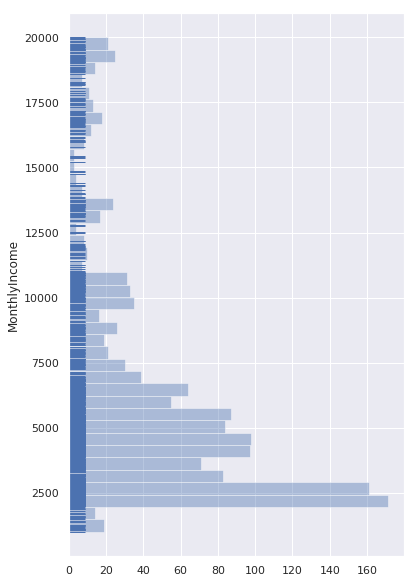

In [254]:
plt.figure(figsize=(6, 10))
sns.distplot(df['MonthlyIncome'], kde=False, vertical=True, rug=True, bins=40)
plt.show

### <font color=navy> <p style="text-align: left;">&#9734; KDE Plot </p></font>

#### <font color=Navy> KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.</font> 

<function matplotlib.pyplot.show(*args, **kw)>

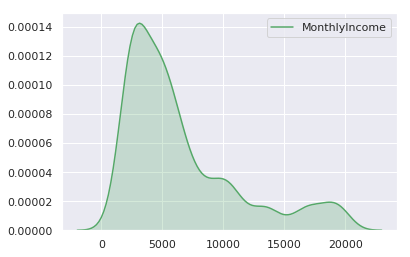

In [241]:
plt.figure(figsize=(6, 4))

sns.set(color_codes=True)
sns.kdeplot(df['MonthlyIncome'], shade=True, color='g')
plt.show

### <font color=navy> <p style="text-align: left;">&#9734; Rug Plot </p></font>

#### <font color=Navy> Only sticks representing actual datapoints with height of 0.5 and shows the distribution of data</font> 

<function matplotlib.pyplot.show(*args, **kw)>

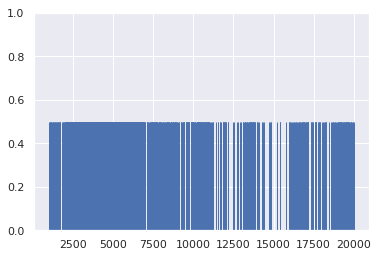

In [244]:
plt.figure(figsize=(6, 4))
sns.rugplot(df['MonthlyIncome'], height=0.5)
plt.show

### <font color=navy> <p style="text-align: left;">&#9734; Multiple KDE plot </p></font>

#### <font color=Navy> To configure the bandwith(std)</font> 

<function matplotlib.pyplot.show(*args, **kw)>

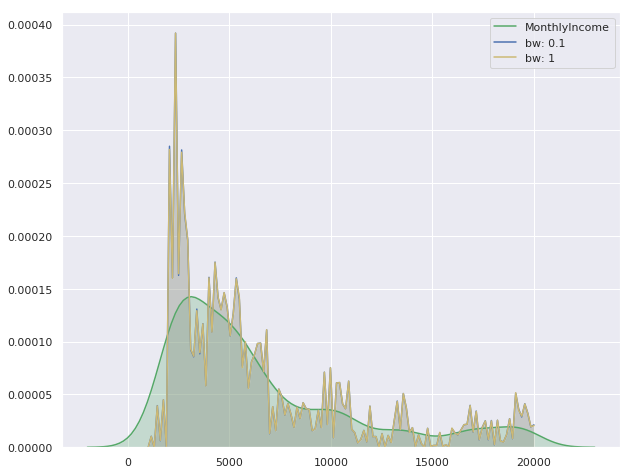

In [245]:
plt.figure(figsize=(10, 8))

sns.set(color_codes=True)
sns.kdeplot(df['MonthlyIncome'], shade=True, color='g')
sns.kdeplot(df['MonthlyIncome'], bw=0.1, label='bw: 0.1', shade=True, color='b')
sns.kdeplot(df['MonthlyIncome'], bw=1, label='bw: 1', shade=True, color='y')
plt.show

### <font color=navy> <p style="text-align: left;">&#9734; Hexbin Plot </p></font>

#### <font color=Navy> The bivariate analougues are histograms</font> 

<function matplotlib.pyplot.show(*args, **kw)>

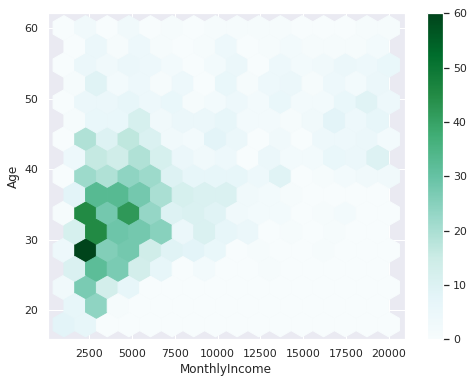

In [265]:
df.plot.hexbin(x= 'MonthlyIncome', y= 'Age',
               gridsize=15, figsize=(8, 6), sharex=False)
plt.xlabel('MonthlyIncome')
plt.ylabel('Age')
plt.show

### <font color=navy> <p style="text-align: left;">&#9734; Joint Plot </p></font>

#### <font color=Navy> Can join any plot of choice</font> 

<function matplotlib.pyplot.show(*args, **kw)>

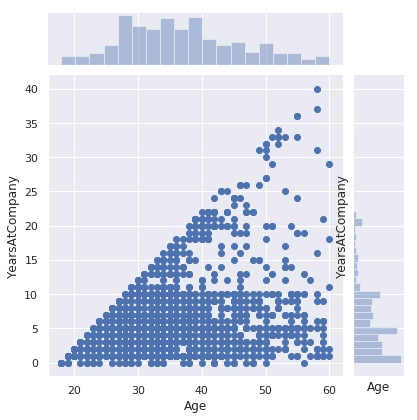

In [271]:
sns.jointplot(x='Age', y='YearsAtCompany', data=df)
plt.xlabel('Age')
plt.ylabel('YearsAtCompany')
plt.show

### <font color=navy> <p style="text-align: left;">&#9734; Lmplot </p></font>

#### <font color=Navy> Regression model with confidence interval line</font> 

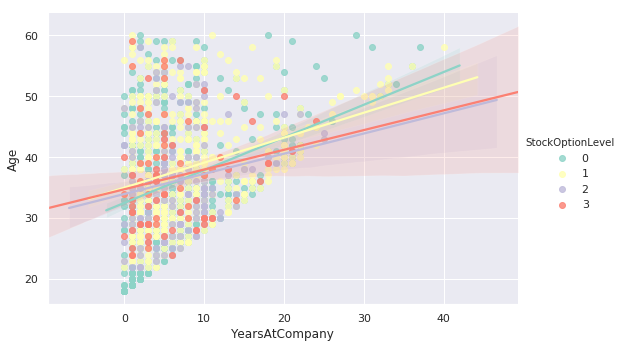

In [294]:
sns.lmplot(x= 'YearsAtCompany', y= 'Age', hue='StockOptionLevel', palette='Set3', aspect=1.5, data=df)

### <font color=navy> <p style="text-align: left;">&#9734; Regplot  </p></font>

#### <font color=Navy> The regplot and lmplot functions are closely related, but regplot is an axes-level function while the lmplot is a figure-level function.</font> 


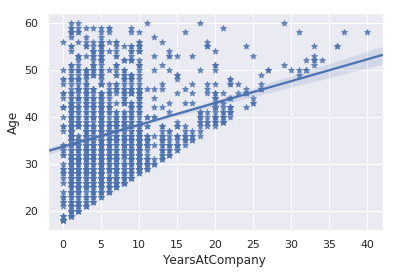

In [295]:
sns.regplot(df['YearsAtCompany'], df['Age'], color='b', marker='*')
plt.show()  

### <font color=navy> <p style="text-align: left;">MAP </p></font>

In [102]:
import plotly.graph_objs as go
print('Done!')

Done!


In [127]:
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
print('Done!')

Done!


In [162]:
trace = dict (type = 'scattergeo', 
              lon = [-122.1, -77.2, 51.3],
              lat = [37.4, 38.9, 35.6],
              marker = dict(size = 10), 
              mode = 'markers',
             )
             

In [169]:
data = [trace]
layout = dict(showlegend = False, geo = dict(showland = True, landcolor = 'silver'))

In [170]:
fig = dict(data = data, layout = layout)
offline.iplot(fig)